In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [3]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [110]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temp_cuts.csv')
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_temp_cuts.csv')
#'/Users/lupitatovar/Cool-Worlds/targets/confirmed_heating_rates.csv' has the calculated heating rates already!
#('/Users/lupitatovar/Cool-Worlds/targets/candidates_heating_rates.csv') has calcualted heating_rates for candidates

#latest version of lists are candidates_temp_cuts.csv

In [115]:
candidates

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,name,Insolation,Period,T_eff,Radius,Discovery,st_log_lum,semi_au,masse_est,hostname,H_Tidal,H_Radio,H_Total
0,0,0,0,0,0,KOI-4427.01,0.318849,147.661729,199.239771,1.797673,Kepler,-1.195000,0.447412,3.885904,KIC 4172805,4.269050e+10,3.373117e+14,3.373544e+14
1,1,1,1,1,1,KOI-4848.01,0.160519,384.696100,167.826873,1.880000,Kepler,-0.883000,0.903101,4.192848,KIC 9005321,2.197108e+10,3.858092e+14,3.858311e+14
2,2,2,2,2,2,KOI-7716.01,0.434274,483.364050,215.238883,1.503482,Kepler,-0.238000,1.153766,2.868943,KIC 5097856,4.704759e+08,1.973302e+14,1.973307e+14
3,4,4,4,4,4,KOI-5087.01,0.332875,651.074310,201.395598,1.141911,Kepler,-0.160000,1.441648,1.563745,KIC 4770798,1.584473e+07,8.645616e+13,8.645618e+13
4,5,5,5,5,5,KOI-5227.01,0.598983,371.564920,233.256197,1.611944,Kepler,-0.251000,0.967816,3.229114,KIC 6034834,2.518710e+09,2.431919e+14,2.431945e+14
5,6,6,6,6,6,KOI-5236.01,0.811569,550.865140,251.658130,1.921435,Kepler,0.160000,1.334558,4.350944,KIC 6067545,6.994064e+08,4.118851e+14,4.118858e+14
6,7,7,7,7,7,KOI-5130.01,0.430720,370.059180,214.797110,1.900000,Kepler,-0.420683,0.938774,4.268858,KIC 5166811,1.127595e+09,3.982537e+14,3.982548e+14
7,8,8,8,8,8,KOI-5408.01,0.354582,415.748785,204.601495,1.710821,Kepler,-0.421000,1.034289,3.572556,KIC 7631138,3.826753e+08,2.907455e+14,2.907459e+14
8,9,9,9,9,9,KOI-5789.01,0.319386,383.262170,199.323573,1.532865,Kepler,-0.545000,0.944805,2.964783,KIC 10387792,5.560228e+08,2.091271e+14,2.091277e+14
9,10,10,10,10,10,KOI-5798.01,0.403587,318.258580,211.331357,1.963136,Kepler,-0.551000,0.834702,4.512475,KIC 10487228,2.157382e+09,4.392886e+14,4.392908e+14


In [116]:
confirmed

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,name,insol,period,T_eff,rade,discoverymethod,semi_au,st_log_lum,masse_est,hostname,eccen,H_Tidal,H_Radio,H_Total
0,2,2,2,2,Kepler-1544 b,0.774587,168.811174,248.740874,1.722270,Kepler,0.539467,-0.647,3.613241,Kepler-1544,0.00,0.000000e+00,2.966217e+14,2.966217e+14
1,4,4,4,4,Kepler-296 f,0.620000,63.336270,212.794092,1.800000,Kepler,0.255000,-1.569,3.894446,Kepler-296,0.33,2.045597e+13,3.386230e+14,3.590790e+14
2,6,6,6,6,Kepler-62 f,0.509360,267.291000,223.993704,1.533375,Kepler,0.722749,-0.575,2.966459,Kepler-62,0.00,0.000000e+00,2.093361e+14,2.093361e+14
3,8,8,8,8,Kepler-1652 b,0.810000,38.097220,253.928767,1.600000,Kepler,0.165400,-1.638,3.188594,Kepler-1652,0.00,0.000000e+00,2.378258e+14,2.378258e+14
4,9,9,9,10,Kepler-441 b,0.241811,207.248200,185.929645,1.568436,Kepler,0.558807,-1.122,3.082536,Kepler-441,0.10,2.515201e+09,2.240267e+14,2.240292e+14
5,10,10,10,11,Kepler-1229 b,0.629999,86.828989,236.218911,1.556471,Kepler,0.315740,-1.202,3.042715,Kepler-1229,0.00,0.000000e+00,2.189383e+14,2.189383e+14


Load up various mass radius planet models from here: https://lweb.cfa.harvard.edu/~lzeng/planetmodels.html#mrrelation

In [81]:
Pure_iron = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/pure_iron.csv',delim_whitespace=True)
rocky_earth = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/earth_like_rocky.csv',delim_whitespace=True)
pure_rock= pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/pure_rock.csv',delim_whitespace=True)
h2o_300k = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/h20_300k.csv',delim_whitespace=True)

In [87]:
h20_mix_300k = pd.read_csv('/Users/lupitatovar/Cool-Worlds/models/h20_mix_300k.csv',delim_whitespace=True)

## Sample by Discovery 

In [98]:
print(len(candidates))
print(len(confirmed))

47
14


Temperature cuts; we only want planets with effective temperatures < 255 K (frozen surface)

In [105]:
#temp_cand_lim = candidates[(candidates['T_eff'].values < 255)]
#temp_conf_lim = confirmed[(confirmed['T_eff'].values < 255)]

In [107]:
#len(temp_cand_lim)

35

In [108]:
#len(temp_conf_lim)

6

In [109]:
#temp_cand_lim.to_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temp_cuts.csv')
#temp_conf_lim.to_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_temp_cuts.csv')

Planetary Models

(0.5, 50.0)

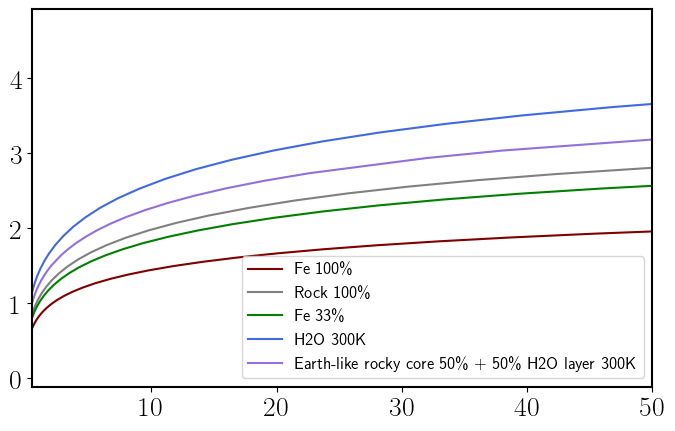

In [90]:
#planet models

plt.plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')
plt.plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
plt.plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
plt.plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
plt.plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')

plt.legend(fontsize = 12)
plt.xlim(0.5,50)
#plt.xscale('linear')

### Mass v Radius

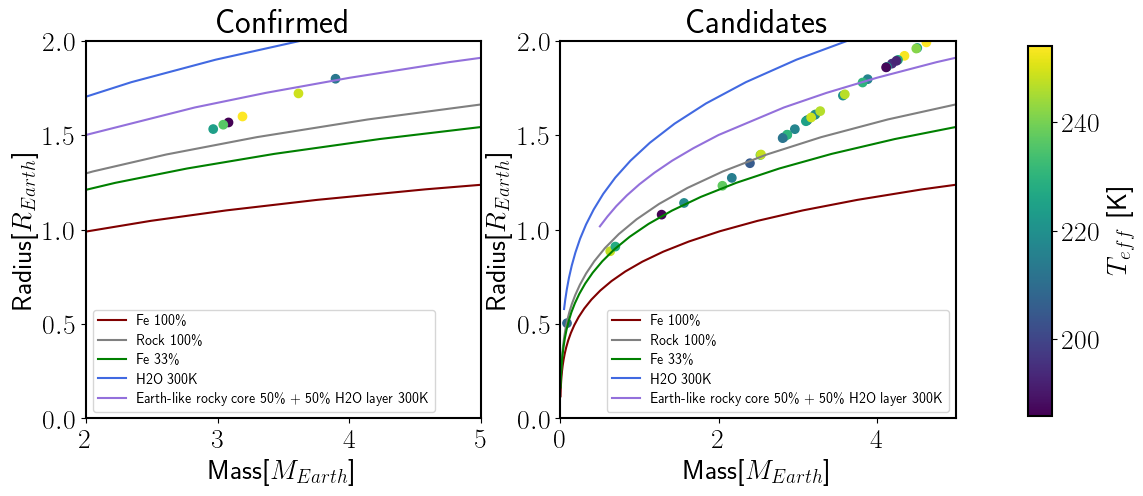

In [112]:
fig, axs = plt.subplots(1,2, figsize=(12,5), facecolor='w', edgecolor='k')

#planet models
axs[0].plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')
axs[0].plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
axs[0].plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
axs[0].plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
axs[0].plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')


#data
axs[0].scatter(confirmed['masse_est'],confirmed['rade'],marker='o',c=confirmed['T_eff'].values)

#setting plot labels
axs[0].set_xlim(2,5)
axs[0].set_ylim(0,2)
axs[0].set_ylabel('Radius[$R_{Earth}$]')
axs[0].set_xlabel('Mass[$M_{Earth}$]')
axs[0].set_title("Confirmed")
axs[0].legend(fontsize=10)

#data part 2
axs[1].scatter(candidates['masse_est'],candidates['Radius'],c=candidates['T_eff'].values)

#planet models
axs[1].plot(Pure_iron['Mass'],Pure_iron['Radius'],color='maroon',label='Fe 100\%')
axs[1].plot(pure_rock['Mass'],pure_rock['Radius'],color='grey',label ='Rock 100\%') #100% MgSiO3
axs[1].plot(rocky_earth['Mass'],rocky_earth['Radius'],color='green',label ='Fe 33\%') #earth-like rocky  (32.5% Fe+67.5% MgSiO3)
axs[1].plot(h2o_300k['Mass'],h2o_300k['Radius'],color ='royalblue', label ='H2O 300K')
axs[1].plot(h20_mix_300k['Mass'],h20_mix_300k['Radius'],color ='mediumpurple', label ='Earth-like rocky core 50\% + 50\% H2O layer 300K')


#plot labels
axs[1].set_xlim(0,5)
axs[1].set_ylim(0,2)
axs[1].set_xlabel('Mass[$M_{Earth}$]')
axs[1].set_ylabel('Radius[$R_{Earth}$]')
axs[1].set_title("Candidates")
axs[1].legend(fontsize=10)


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.91, 0.13, 0.02, 0.74])
s = plt.scatter(confirmed['masse_est'],confirmed['rade'],marker='o',c=confirmed['T_eff'].values)
fig.colorbar(s, cax=cbar_ax,label='$T_{eff}$ [K]')

Text(0.5, 1.0, 'Confirmed Planets')

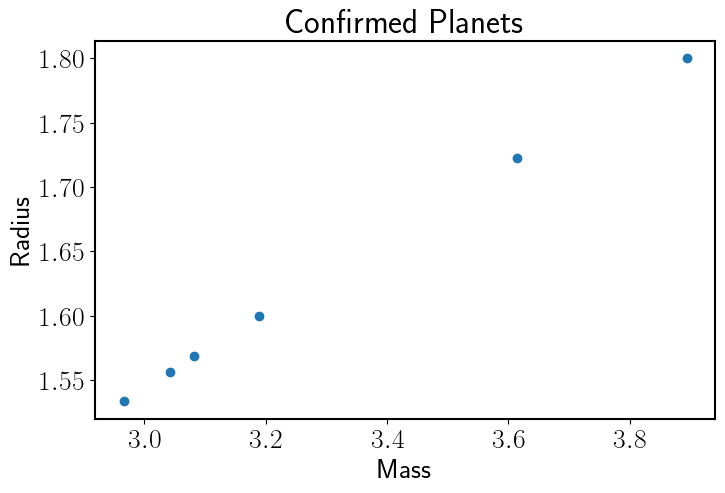

In [113]:
plt.scatter(confirmed['masse_est'],confirmed['rade'])


plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('Confirmed Planets')

Text(0.5, 1.0, 'Candidate Planets')

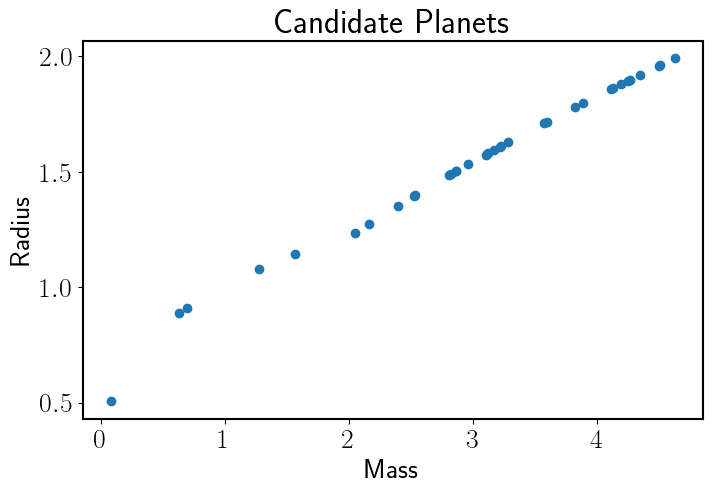

In [118]:
plt.scatter(candidates['masse_est'],candidates['Radius'])
plt.xlabel('Mass')
plt.ylabel('Radius')
plt.title('Candidate Planets')

### Insolation v Radius

Text(0.5, 1.0, 'Confirmed Planets')

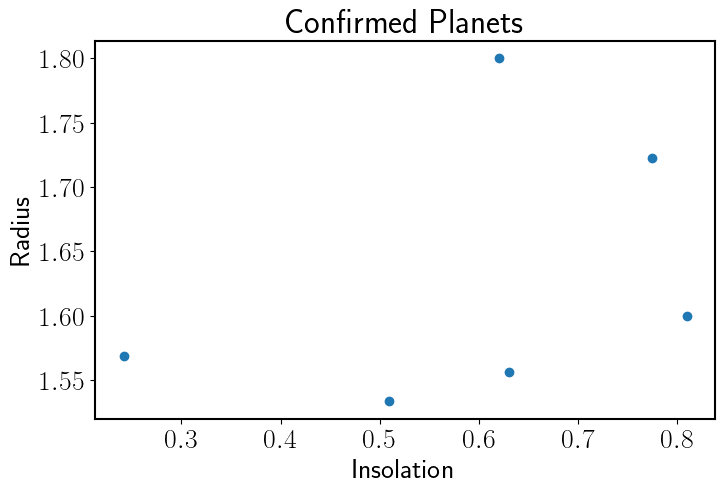

In [117]:
plt.scatter(confirmed['insol'],confirmed['rade'])
plt.xlabel('Insolation')
plt.ylabel('Radius')
plt.title('Confirmed Planets')

Text(0.5, 1.0, 'Candidate Planets')

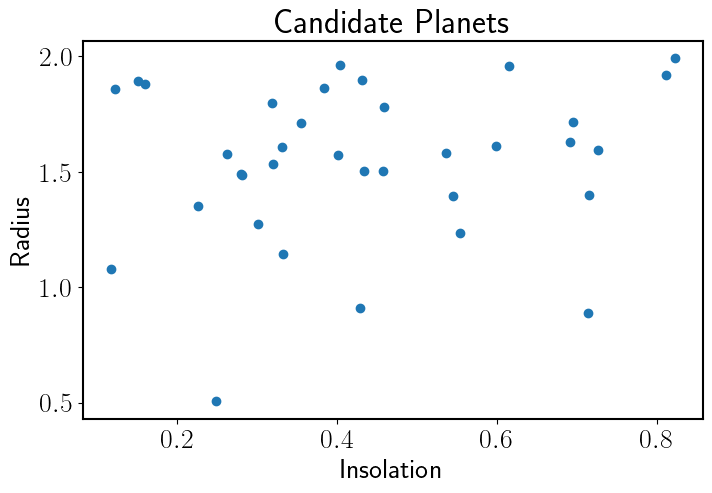

In [119]:
plt.scatter(candidates['Insolation'],candidates['Radius'])
plt.xlabel('Insolation')
plt.ylabel('Radius')
plt.title('Candidate Planets')

### Insolation v Mass

Text(0.5, 1.0, 'Confirmed Planets')

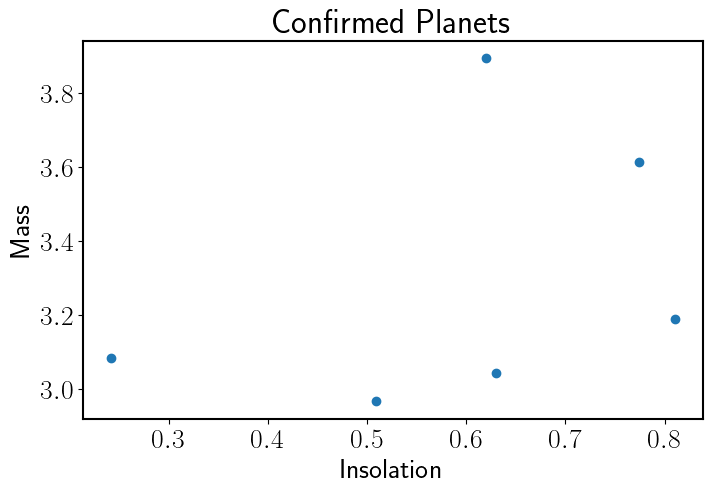

In [120]:
plt.scatter(confirmed['insol'],confirmed['masse_est'])
plt.xlabel('Insolation')
plt.ylabel('Mass')
plt.title('Confirmed Planets')

Text(0.5, 1.0, 'Candidate Planets')

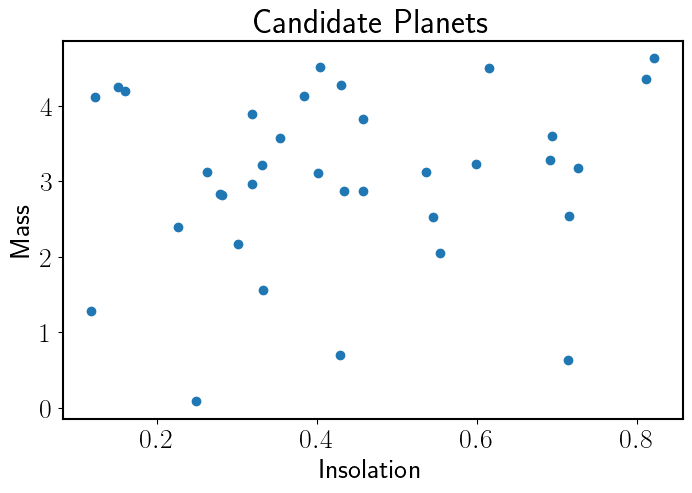

In [122]:
plt.scatter(candidates['Insolation'],candidates['masse_est'])
plt.xlabel('Insolation')
plt.ylabel('Mass')
plt.title('Candidate Planets')

### Surface Area/volume ratio versus H_Total

In [130]:
cand_rad_m = (candidates['Radius'].values*u.R_earth).to(u.m)

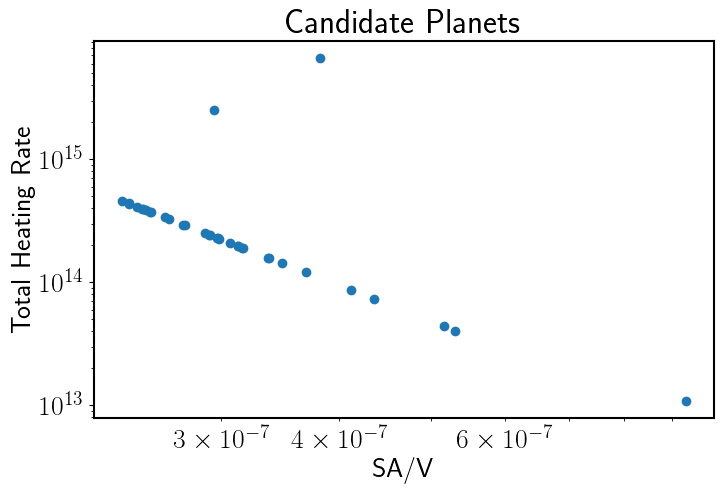

In [137]:
plt.scatter((3/cand_rad_m),candidates['H_Total'])
plt.xlabel('SA/V')
plt.ylabel('Total Heating Rate')
plt.title('Candidate Planets')
plt.xscale('log')
plt.yscale('log')

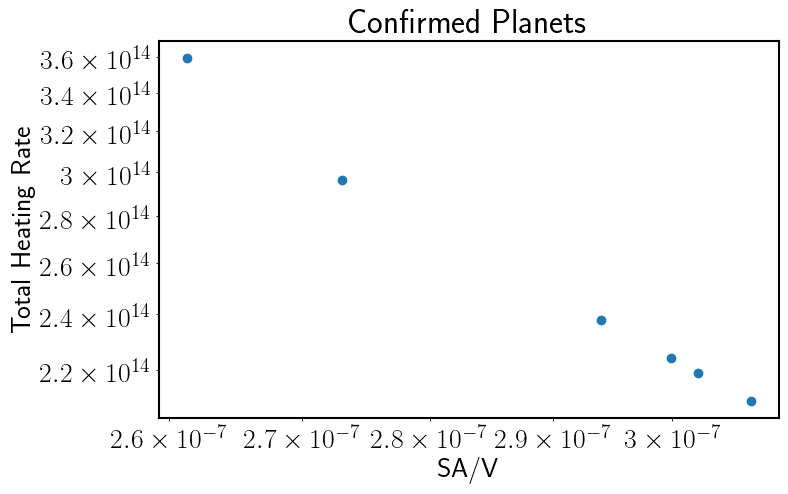

In [139]:
conf_rad_m = (confirmed['rade'].values*u.R_earth).to(u.m)
plt.scatter((3/conf_rad_m),confirmed['H_Total'])
plt.xlabel('SA/V')
plt.ylabel('Total Heating Rate')
plt.title('Confirmed Planets')
plt.xscale('log')
plt.yscale('log')